In [1]:
import os
from glob import glob
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import torch
from torch import nn
import torchvision
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, datasets

from PIL import Image
import pathlib 
from sklearn.model_selection import train_test_split
import tqdm

In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [3]:
image_path = Path('C:/Users/Mahesh/Downloads/CAPTCHA_detection/samples/')

In [4]:
image_paths = []
labels = []

for file in tqdm.tqdm(os.listdir(image_path)):
    label = file.split('/')[-1].split('.')[0]
    image_paths.append(file)
    labels.append(label)

print(f"Length of image_paths: {len(image_paths)}")
print(f"Length of labels: {len(labels)}")


100%|██████████| 1070/1070 [00:00<00:00, 531427.51it/s]

Length of image_paths: 1070
Length of labels: 1070


In [5]:
unique_chars = sorted(set(char for label in labels for char in label))
print(f"Unique Chars: {unique_chars}")
print(f"Total Number of Unique Chars: {len(unique_chars)}")

Unique Chars: ['2', '3', '4', '5', '6', '7', '8', 'b', 'c', 'd', 'e', 'f', 'g', 'm', 'n', 'p', 'w', 'x', 'y']
Total Number of Unique Chars: 19


In [6]:
# Print lengths for debugging
print(f"Length of image_paths: {len(image_paths)}")
print(f"Length of labels: {len(labels)}")

Length of image_paths: 1070
Length of labels: 1070


In [7]:
import os

# Define your character-to-index mapping
char_to_num = {char: idx for idx, char in enumerate(['2', '3', '4', '5', '6', '7', '8', 'b', 'c', 'd', 'e', 'f', 'g', 'm', 'n', 'p', 'w', 'x', 'y'])}

def encode_label(label):
    return [char_to_num.get(char, 0) for char in label]

def get_label_from_filename(filename):
    return os.path.splitext(filename)[0]

# Assuming image_paths is a list of filenames
encoded_labels = [encode_label(get_label_from_filename(filename)) for filename in image_paths]

# Print the first 5 encoded labels to verify
print(f"Encoded labels: {encoded_labels[:5]}")


Encoded labels: [[0, 0, 4, 13, 9], [0, 0, 9, 3, 14], [0, 1, 3, 4, 12], [0, 1, 13, 9, 12], [0, 1, 14, 6, 6]]


In [8]:
# Print lengths for debugging
print(f"Length of image_paths: {len(image_paths)}")
print(f"Length of labels: {len(labels)}")

Length of image_paths: 1070
Length of labels: 1070


In [9]:
import os

# Define your character-to-index mapping
unique_chars = ['2', '3', '4', '5', '6', '7', '8', 'b', 'c', 'd', 'e', 'f', 'g', 'm', 'n', 'p', 'w', 'x', 'y']
char_to_num = {char: idx for idx, char in enumerate(unique_chars)}

def encode_label(label):
    return [char_to_num.get(char, 0) for char in label]

def get_label_from_filename(filename):
    return os.path.splitext(filename)[0]


# Debug: Print character-to-number mapping
print("Character-to-Index Mapping:")
for char, idx in char_to_num.items():
    print(f"'{char}': {idx}")

# Encode labels
encoded_labels = [encode_label(get_label_from_filename(filename)) for filename in image_paths]

# Print the first 5 encoded labels to verify
print(f"Encoded labels: {encoded_labels}")

# Additional Debug: Verify encoding
print("Verifying Encoding:")
for filename in image_paths:
    label = get_label_from_filename(filename)
    encoded = encode_label(label)
    print(f"Filename: {filename}, True Label: {label}, Encoded: {encoded}")


Character-to-Index Mapping:
'2': 0
'3': 1
'4': 2
'5': 3
'6': 4
'7': 5
'8': 6
'b': 7
'c': 8
'd': 9
'e': 10
'f': 11
'g': 12
'm': 13
'n': 14
'p': 15
'w': 16
'x': 17
'y': 18
Encoded labels: [[0, 0, 4, 13, 9], [0, 0, 9, 3, 14], [0, 1, 3, 4, 12], [0, 1, 13, 9, 12], [0, 1, 14, 6, 6], [0, 2, 1, 13, 13], [0, 2, 2, 10, 0], [0, 2, 3, 18, 3], [0, 2, 11, 4, 16], [0, 2, 15, 10, 16], [0, 3, 0, 3, 5], [0, 3, 1, 9, 8], [0, 3, 10, 12, 15], [0, 3, 13, 4, 15], [0, 3, 15, 0, 13], [0, 3, 16, 3, 1], [0, 4, 2, 13, 3], [0, 4, 6, 12, 0], [0, 6, 1, 2, 6], [0, 6, 17, 2, 5], [0, 7, 6, 0, 5], [0, 7, 12, 2, 6], [0, 8, 10, 12, 11], [0, 8, 12, 3, 6], [0, 8, 12, 18, 17], [0, 10, 14, 5, 12], [0, 10, 14, 11, 2], [0, 11, 17, 12, 9], [0, 12, 5, 6, 1], [0, 12, 5, 14, 13], [0, 12, 18, 7, 4], [0, 13, 12, 6, 5], [0, 13, 15, 14, 14], [0, 14, 5, 1, 11], [0, 14, 7, 8, 3], [0, 14, 7, 8, 17], [0, 14, 11, 0, 4], [0, 14, 15, 12, 4], [0, 14, 17, 1, 6], [0, 15, 0, 18, 6], [0, 15, 11, 15, 14], [0, 16, 2, 18, 5], [0, 16, 8, 1, 6], [0, 16

In [10]:
X_train, X_test, y_train, y_test = train_test_split(image_paths, labels, test_size=0.1, shuffle=True, random_state=42)

In [11]:
import os
from PIL import Image
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
import numpy as np
from sklearn.model_selection import train_test_split

# Define the character-to-index mapping
unique_chars = ['2', '3', '4', '5', '6', '7', '8', 'b', 'c', 'd', 'e', 'f', 'g', 'm', 'n', 'p', 'w', 'x', 'y']
char_to_num = {char: idx for idx, char in enumerate(unique_chars)}

def encode_label(label):
    return [char_to_num.get(char, 0) for char in label]

class CaptchaDataset(Dataset):
    def __init__(self, image_paths, labels, transform=None):
        self.image_paths = image_paths
        self.labels = labels
        self.transform = transform

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        img_path = self.image_paths[idx]
        label = self.labels[idx]
        
        # Load image
        image = Image.open(img_path).convert('RGB')
        
        # Apply transformations
        if self.transform:
            image = self.transform(image)
        
        # Encode label
        encoded_label = encode_label(label)
        
        # Pad or truncate label to fixed length (e.g., 5)
        max_length = 5
        if len(encoded_label) < max_length:
            encoded_label = encoded_label + [0] * (max_length - len(encoded_label))
        else:
            encoded_label = encoded_label[:max_length]
        
        return image, np.array(encoded_label)

# Transformations
transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.GaussianBlur(kernel_size=(5, 9), sigma=(0.1, 5)),
    transforms.ToTensor(),
])

# Example paths and labels (replace with actual file paths and labels)
image_path = 'C:/Users/Mahesh/Downloads/CAPTCHA_detection/samples/'
image_paths = [os.path.join(image_path, file) for file in os.listdir(image_path)]
labels = [os.path.splitext(file)[0] for file in os.listdir(image_path)]

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(image_paths, labels, test_size=0.1, shuffle=True, random_state=42)

# Create datasets
train_dataset = CaptchaDataset(X_train, y_train, transform=transform)
test_dataset = CaptchaDataset(X_test, y_test, transform=transform)

# Create dataloaders
train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Example usage
for images, labels in train_dataloader:
    print(images.size(), labels)
    break


torch.Size([32, 3, 128, 128]) tensor([[ 2,  9, 12, 11,  5],
        [ 4, 16,  7,  5,  4],
        [17,  1,  6, 11, 14],
        [ 6,  3, 15, 10, 16],
        [ 2, 14,  8,  1,  5],
        [14, 11,  5,  7, 14],
        [ 8,  5,  3,  1, 10],
        [ 8,  0, 12,  2,  9],
        [14,  3, 16,  7, 12],
        [11,  1,  3, 17, 15],
        [ 9, 16,  4, 13, 14],
        [ 9,  9, 15, 18,  7],
        [ 6, 10,  1,  0, 13],
        [ 4,  2,  7,  1, 15],
        [ 6, 18, 15,  9, 14],
        [18,  1,  0, 18, 18],
        [11, 15,  1,  6,  0],
        [16,  0, 10,  6,  5],
        [ 0,  3, 13,  4, 15],
        [12,  0, 11, 14, 16],
        [ 2,  4,  5,  9,  3],
        [14, 12, 14,  0,  4],
        [ 3,  5,  2,  9,  5],
        [12, 10,  8, 13, 11],
        [ 1,  5,  1, 12,  7],
        [13,  4,  5,  7,  1],
        [ 1,  6,  5, 12,  0],
        [ 2,  5, 10,  2, 15],
        [ 3, 14,  5,  1,  0],
        [ 0,  1, 13,  9, 12],
        [14, 16, 11,  9, 10],
        [ 2,  9,  0,  0, 13]], dtype=tor

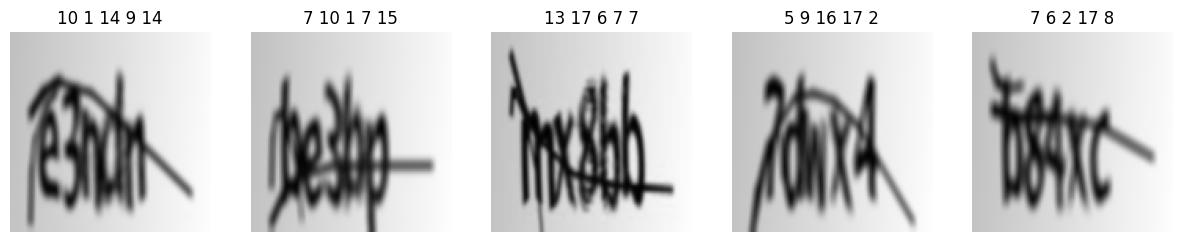

In [12]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

def plot_samples(dataset, num_samples=5):
    fig, axes = plt.subplots(1, num_samples, figsize=(15, 5))
    for i in range(num_samples):
        image, label = dataset[i]
        image = image.permute(1, 2, 0).numpy()  # Convert image tensor to numpy array
        label_str = ' '.join(map(str, label))  # Convert label tensor to a space-separated string
        
        axes[i].imshow(image)
        axes[i].axis('off')
        axes[i].set_title(label_str)
    
    plt.show()

# Example usage
plot_samples(train_dataset, num_samples=5)


In [13]:
print(f"Training Size : {len(X_train)} samples.")
print(f"Testing Size  : {len(X_test)} samples.")

Training Size : 963 samples.
Testing Size  : 107 samples.


In [14]:
import torch
import torch.nn as nn
import torchvision.models as models

class EfficientNetWithRNN(nn.Module):
    def __init__(self, num_classes, seq_len=5, hidden_size=256, num_layers=2):
        super(EfficientNetWithRNN, self).__init__()
        
        # Load EfficientNet pre-trained
        self.efficientnet = models.efficientnet_b0(pretrained=True)
        in_features = self.efficientnet.classifier[1].in_features
        
        # Replace the classifier with a new one that outputs features
        self.efficientnet.classifier = nn.Identity()
        
        # RNN layer
        self.rnn = nn.LSTM(input_size=in_features, hidden_size=hidden_size, num_layers=num_layers, batch_first=True, dropout=0.5, bidirectional=True)
        
        # Output layer
        self.fc = nn.Linear(hidden_size * 2, num_classes)  # Bidirectional LSTM doubles the hidden size
        
        # The sequence length (e.g., number of characters in the CAPTCHA)
        self.seq_len = seq_len
        
    def forward(self, x):
        # Extract features from EfficientNet
        features = self.efficientnet(x)  # Output shape: [batch_size, in_features]
        
        # Repeat features seq_len times to create a "sequence" of features
        features = features.unsqueeze(1).repeat(1, self.seq_len, 1)  # Shape: [batch_size, seq_len, in_features]
        
        # Pass through RNN
        rnn_out, _ = self.rnn(features)  # Shape: [batch_size, seq_len, hidden_size * 2]
        
        # Pass through the output layer
        output = self.fc(rnn_out)  # Shape: [batch_size, seq_len, num_classes]
        
        return output

# Define number of classes (total unique characters in your CAPTCHA dataset)
num_classes = len(unique_chars) 

# Define sequence length (fixed length of CAPTCHA)
seq_len = 5

# Initialize model
model = EfficientNetWithRNN(num_classes=num_classes, seq_len=seq_len).to(device)

# Define CTCLoss
criterion = nn.CTCLoss(blank=0, zero_infinity=True)


c:\Users\Mahesh\AppData\Local\Programs\Python\Python311\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\Mahesh\AppData\Local\Programs\Python\Python311\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=EfficientNet_B0_Weights.IMAGENET1K_V1`. You can also use `weights=EfficientNet_B0_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [15]:
for images, labels in train_dataloader:
    images, labels = images.to(device), labels.to(device)
    outputs = model(images)  # Outputs should have shape [batch_size, seq_len, num_classes]

    # Print shapes
    print(f"Output shape: {outputs.shape}")  # Should be [batch_size, seq_len, num_classes]
    print(f"Labels shape: {labels.shape}")  # Should be [batch_size, captcha_length]


Output shape: torch.Size([32, 5, 19])
Labels shape: torch.Size([32, 5])
Output shape: torch.Size([32, 5, 19])
Labels shape: torch.Size([32, 5])
Output shape: torch.Size([32, 5, 19])
Labels shape: torch.Size([32, 5])
Output shape: torch.Size([32, 5, 19])
Labels shape: torch.Size([32, 5])
Output shape: torch.Size([32, 5, 19])
Labels shape: torch.Size([32, 5])
Output shape: torch.Size([32, 5, 19])
Labels shape: torch.Size([32, 5])
Output shape: torch.Size([32, 5, 19])
Labels shape: torch.Size([32, 5])
Output shape: torch.Size([32, 5, 19])
Labels shape: torch.Size([32, 5])
Output shape: torch.Size([32, 5, 19])
Labels shape: torch.Size([32, 5])
Output shape: torch.Size([32, 5, 19])
Labels shape: torch.Size([32, 5])
Output shape: torch.Size([32, 5, 19])
Labels shape: torch.Size([32, 5])
Output shape: torch.Size([32, 5, 19])
Labels shape: torch.Size([32, 5])
Output shape: torch.Size([32, 5, 19])
Labels shape: torch.Size([32, 5])
Output shape: torch.Size([32, 5, 19])
Labels shape: torch.Size([

In [16]:
ctc_loss = nn.CTCLoss(blank=0).cuda()
logits = model(images)  # Forward pass
logits = logits.permute(1, 0, 2)  # Reshape for CTC Loss (seq_len, batch_size, num_classes)

input_lengths = torch.full(size=(logits.size(1),), fill_value=logits.size(0), dtype=torch.long).cuda()
target_lengths = torch.full(size=(labels.size(0),), fill_value=labels.size(1), dtype=torch.long).cuda()

loss = ctc_loss(logits, labels, input_lengths, target_lengths)
print("Loss:", loss.item())


Loss: inf


In [17]:
print("Input lengths:", input_lengths)
print("Target lengths:", target_lengths)


Input lengths: tensor([5, 5, 5], device='cuda:0')
Target lengths: tensor([5, 5, 5], device='cuda:0')


In [21]:
import torch
import torch.nn as nn
import torch.optim as optim

# # Define device
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Model, criterion, and optimizer
model = EfficientNetWithRNN(num_classes=num_classes).to(device)
criterion = nn.CTCLoss(blank=0, zero_infinity=True)
optimizer = optim.Adam(model.parameters(), lr=0.001)

# # Training and validation loop
# def train_model(model, train_dataloader, val_dataloader, num_epochs=20):
#     for epoch in range(num_epochs):
#         print(f"Epoch {epoch+1}/{num_epochs}")

#         # Training phase
#         model.train()
#         train_loss = 0.0
#         correct_train_preds = 0
#         total_train_preds = 0

#         for images, labels in train_dataloader:
#             images, labels = images.to(device), labels.to(device)
#             batch_size = images.size(0)

#             # Forward pass
#             optimizer.zero_grad()
#             outputs = model(images)

#             # Reshape outputs for CTC loss (batch, seq_len, num_classes)
#             outputs = outputs.permute(1, 0, 2)  # CTC expects [seq_len, batch_size, num_classes]
#             input_lengths = torch.full(size=(batch_size,), fill_value=outputs.size(0), dtype=torch.long)
#             target_lengths = torch.full(size=(batch_size,), fill_value=labels.size(1), dtype=torch.long)

#             # Compute loss
#             loss = criterion(outputs, labels, input_lengths, target_lengths)

#             # Backward pass and optimization
#             loss.backward()
#             optimizer.step()

#             # Accumulate training loss
#             train_loss += loss.item()

#             # Calculate train accuracy (optional for CTC)
#             _, predicted_labels = torch.max(outputs, 2)  # Get predicted labels
#             predicted_labels = predicted_labels.permute(1, 0)  # Align with labels
#             correct_train_preds += (predicted_labels == labels).sum().item()
#             total_train_preds += labels.numel()

#         train_loss /= len(train_dataloader)
#         train_accuracy = correct_train_preds / total_train_preds
#         print(f"Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.4f}")

#         # Validation phase
#         model.eval()
#         val_loss = 0.0
#         correct_val_preds = 0
#         total_val_preds = 0

#         with torch.no_grad():
#             for images, labels in val_dataloader:
#                 images, labels = images.to(device), labels.to(device)
#                 batch_size = images.size(0)

#                 # Forward pass
#                 outputs = model(images)

#                 # Reshape outputs for CTC loss
#                 outputs = outputs.permute(1, 0, 2)
#                 input_lengths = torch.full(size=(batch_size,), fill_value=outputs.size(0), dtype=torch.long)
#                 target_lengths = torch.full(size=(batch_size,), fill_value=labels.size(1), dtype=torch.long)

#                 # Compute loss
#                 loss = criterion(outputs, labels, input_lengths, target_lengths)

#                 # Accumulate validation loss
#                 val_loss += loss.item()

#                 # Calculate validation accuracy (optional for CTC)
#                 _, predicted_labels = torch.max(outputs, 2)
#                 predicted_labels = predicted_labels.permute(1, 0)
#                 correct_val_preds += (predicted_labels == labels).sum().item()
#                 total_val_preds += labels.numel()

#         val_loss /= len(val_dataloader)
#         val_accuracy = correct_val_preds / total_val_preds
#         print(f"Val Loss: {val_loss:.4f}, Val Accuracy: {val_accuracy:.4f}")

# train_model(model, train_dataloader, test_dataloader, num_epochs=20)


In [22]:
# Training loop
epochs = 150
for epoch in range(epochs):
    # Set the model to training mode
    model.train()
    train_loss = 0.0
    correct_train = 0
    total_train = 0

    # Training loop
    for images, labels in train_dataloader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)  # Model output shape should be [batch_size, seq_len, num_classes]

        # CTCLoss expects inputs in (seq_len, batch_size, num_classes) format
        outputs = outputs.permute(1, 0, 2)  # Change to (seq_len, batch_size, num_classes)

        # Set input lengths and target lengths
        input_lengths = torch.full((images.size(0),), outputs.size(0), dtype=torch.long).to(device)  # [batch_size] filled with seq_len
        target_lengths = torch.full((images.size(0),), labels.size(1), dtype=torch.long).to(device)  # [batch_size] filled with target seq_len

        # Calculate CTC Loss
        loss = criterion(outputs, labels, input_lengths, target_lengths)
        loss.backward()
        optimizer.step()

        train_loss += loss.item() * images.size(0)

        # Calculate training accuracy
        _, preds = torch.max(outputs, 2)  # Get the index of the max log-probability
        preds = preds.transpose(0, 1)  # Back to (batch_size, seq_len)

        # Ensure preds and labels have the same shape
        seq_len = preds.size(1)
        label_len = labels.size(1)

        if seq_len != label_len:
            min_len = min(seq_len, label_len)
            preds = preds[:, :min_len]
            labels = labels[:, :min_len]

        correct_train += (preds == labels).sum().item()
        total_train += labels.numel()

    train_loss /= len(train_dataloader)
    train_accuracy = correct_train / total_train

    # Validation loop
    model.eval()  # Set the model to evaluation mode
    test_loss = 0.0
    correct_test = 0
    total_test = 0

    with torch.no_grad():  # Disable gradient calculation
        for images, labels in test_dataloader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)  # Model output shape should be [batch_size, seq_len, num_classes]

            # CTCLoss expects inputs in (seq_len, batch_size, num_classes) format
            outputs = outputs.permute(1, 0, 2)  # Change to (seq_len, batch_size, num_classes)

            # Set input lengths and target lengths
            input_lengths = torch.full((images.size(0),), outputs.size(0), dtype=torch.long).to(device)  # [batch_size] filled with seq_len
            target_lengths = torch.full((images.size(0),), labels.size(1), dtype=torch.long).to(device)  # [batch_size] filled with target seq_len

            # Calculate CTC Loss
            loss = criterion(outputs, labels, input_lengths, target_lengths)
            test_loss += loss.item() * images.size(0)

            # Calculate test accuracy
            _, preds = torch.max(outputs, 2)  # Get the index of the max log-probability
            preds = preds.transpose(0, 1)  # Back to (batch_size, seq_len)

            # Ensure preds and labels have the same shape
            seq_len = preds.size(1)
            label_len = labels.size(1)

            if seq_len != label_len:
                min_len = min(seq_len, label_len)
                preds = preds[:, :min_len]
                labels = labels[:, :min_len]

            correct_test += (preds == labels).sum().item()
            total_test += labels.numel()

    test_loss /= len(test_dataloader)
    test_accuracy = correct_test / total_test

    # Print results
    print(f"Epoch {epoch+1}/{epochs}, Training Loss: {train_loss:.4f}, Training Accuracy: {train_accuracy:.4f}")
    print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")


Epoch 1/150, Training Loss: 72.7508, Training Accuracy: 0.0785
Test Loss: 54.1788, Test Accuracy: 0.0505
Epoch 2/150, Training Loss: 72.9207, Training Accuracy: 0.0756
Test Loss: 58.4001, Test Accuracy: 0.1047
Epoch 3/150, Training Loss: 71.6522, Training Accuracy: 0.0999
Test Loss: 58.4011, Test Accuracy: 0.1009
Epoch 4/150, Training Loss: 72.7527, Training Accuracy: 0.1003
Test Loss: 59.8078, Test Accuracy: 0.1028
Epoch 5/150, Training Loss: 73.1764, Training Accuracy: 0.0995
Test Loss: 59.7541, Test Accuracy: 0.1028
Epoch 6/150, Training Loss: 73.3513, Training Accuracy: 0.0893
Test Loss: 59.5805, Test Accuracy: 0.1028
Epoch 7/150, Training Loss: 73.1292, Training Accuracy: 0.0993
Test Loss: 59.9445, Test Accuracy: 0.1028
Epoch 8/150, Training Loss: 73.1287, Training Accuracy: 0.0966
Test Loss: 59.9782, Test Accuracy: 0.1028
Epoch 9/150, Training Loss: 72.9277, Training Accuracy: 0.0920
Test Loss: 60.0859, Test Accuracy: 0.1028
Epoch 10/150, Training Loss: 73.0405, Training Accuracy

In [23]:
# Example check for data leakage
train_set_files = set(X_train)
test_set_files = set(X_test)

common_files = train_set_files.intersection(test_set_files)
if common_files:
    print(f"Data leakage detected! Common files: {common_files}")
else:
    print("No data leakage detected.")


No data leakage detected.


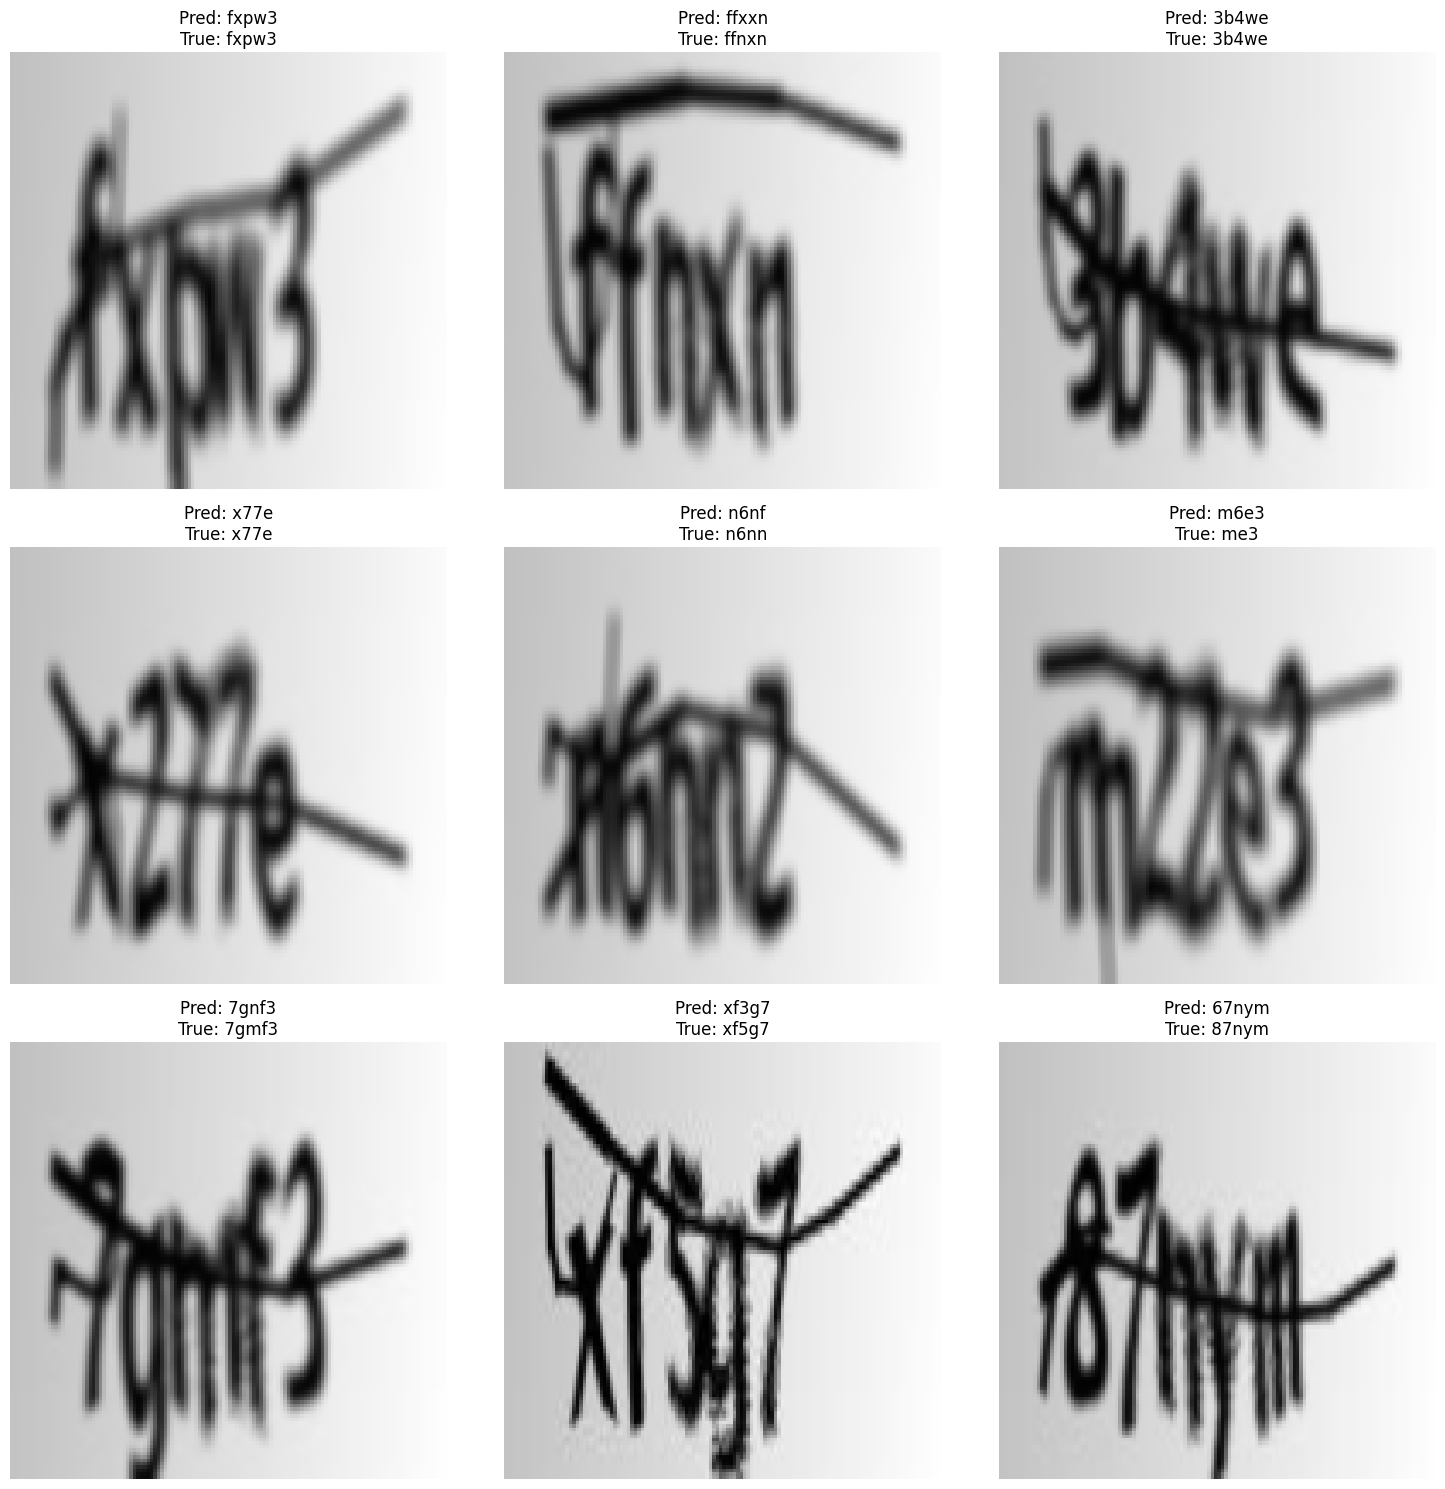

In [24]:
import torch
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
from torchvision import transforms


def decode_ctc(preds, unique_chars):
    # Convert CTC outputs to readable strings
    batch_size, seq_len = preds.size()[:2]
    preds = preds.argmax(dim=-1)  # Get the index of the max log probability
    pred_strings = []

    for i in range(batch_size):
        pred = preds[i].cpu().numpy()  # Shape: [seq_len]
        pred_string = ''.join([unique_chars[c] for c in pred if c != 0])  # Convert indices to chars
        pred_strings.append(pred_string)

    return pred_strings


def decode_labels(labels, unique_chars):
    batch_size, seq_len = labels.size()
    label_strings = []
    for i in range(batch_size):
        label = labels[i].cpu().numpy()  # Shape: [seq_len]
        label_string = ''.join([unique_chars[c] for c in label if c != 0])
        label_strings.append(label_string)
    return label_strings

import matplotlib.pyplot as plt

def plot_truth_vs_pred(model, dataloader, unique_chars, device, num_images=9):
    model.eval()  # Set the model to evaluation mode
    with torch.no_grad():
        # Get a batch of data
        for images, labels in dataloader:
            images, labels = images.to(device), labels.to(device)

            # Get model outputs
            outputs = model(images)  # Shape: [batch_size, seq_len, num_classes]

            # Decode predictions
            pred_strings = decode_ctc(outputs, unique_chars)
            true_strings = decode_labels(labels, unique_chars)

            # Select a subset of images
            num_images = min(num_images, len(images))
            selected_indices = range(num_images)

            # Plot
            plt.figure(figsize=(15, 15))
            for i in selected_indices:
                plt.subplot(3, 3, i + 1)  # 3x3 grid
                plt.title(f'Pred: {pred_strings[i]}\nTrue: {true_strings[i]}')
                plt.imshow(images[i].cpu().permute(1, 2, 0))
                plt.axis('off')
            plt.tight_layout()
            plt.show()
            break  # Remove break to plot for the entire dataset



# Example usage
plot_truth_vs_pred(model, test_dataloader, unique_chars, device)


In [25]:
import torch

# Assuming your model is trained and called `model`

# Define a path to save the model
model_save_path = "captcha_detection_model.pth"

# Save the model's state_dict
torch.save(model.state_dict(), model_save_path)

print(f"Model saved to {model_save_path}")


Model saved to captcha_detection_model.pth


In [26]:
# Load your trained model
loaded_model = EfficientNetWithRNN(num_classes=num_classes, seq_len=seq_len).to(device)

# Load the saved model parameters
loaded_model.load_state_dict(torch.load("captcha_detection_model.pth"))
loaded_model.eval()  # Set the model to evaluation mode


EfficientNetWithRNN(
  (efficientnet): EfficientNet(
    (features): Sequential(
      (0): Conv2dNormActivation(
        (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): SiLU(inplace=True)
      )
      (1): Sequential(
        (0): MBConv(
          (block): Sequential(
            (0): Conv2dNormActivation(
              (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
              (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
              (2): SiLU(inplace=True)
            )
            (1): SqueezeExcitation(
              (avgpool): AdaptiveAvgPool2d(output_size=1)
              (fc1): Conv2d(32, 8, kernel_size=(1, 1), stride=(1, 1))
              (fc2): Conv2d(8, 32, kernel_size=(1, 1), stride=(1, 1))
              (activation): SiLU(inplace=True)
         

In [27]:
import gradio as gr
import torch
import torchvision.transforms as transforms
from PIL import Image

# Define the preprocessing pipeline (resize, blur, and convert to tensor)
transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.GaussianBlur(kernel_size=(5, 9), sigma=(0.1, 5)),
    transforms.ToTensor(),
])

# Load your model
model = EfficientNetWithRNN(num_classes=len(unique_chars)).to(device)
model.load_state_dict(torch.load("captcha_detection_model.pth"))
model.eval()

# Define character set and the decoding function
unique_chars = ['2', '3', '4', '5', '6', '7', '8', 'b', 'c', 'd', 'e', 'f', 'g', 'm', 'n', 'p', 'w', 'x', 'y']
char_to_num = {char: idx for idx, char in enumerate(unique_chars)}
num_to_char = {idx: char for char, idx in char_to_num.items()}

def predict(image):
    # Ensure the input is a PIL image
    if not isinstance(image, Image.Image):
        raise TypeError("Expected a PIL Image, but got: {}".format(type(image)))
    
    # Preprocess the input image
    image = transform(image).unsqueeze(0)  # Add batch dimension
    
    # Move the image to the same device as the model (if applicable)
    image = image.to(device)
    
    # Make a prediction
    with torch.no_grad():
        output = model(image)
    
    # Decode the output (e.g., convert the indices to characters)
    predicted_indices = torch.argmax(output, dim=2)

    # Ensure predicted indices are valid
    predicted_label = ""
    for idx in predicted_indices[0]:
        idx = idx.item()
        if idx in num_to_char:  # Check if the index is within the valid range
            predicted_label += num_to_char[idx]
        else:
            predicted_label += '?'  # Handle invalid index case (optional)
    
    return predicted_label

# Create a Gradio interface
interface = gr.Interface(fn=predict, inputs=gr.Image(type="pil"), outputs="text", title="CAPTCHA Detection")

# Launch the app
interface.launch()


c:\Users\Mahesh\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\Mahesh\AppData\Local\Programs\Python\Python311\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\Mahesh\AppData\Local\Programs\Python\Python311\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=EfficientNet_B0_Weights.IMAGENET1K_V1`. You can also use `weights=EfficientNet_B0_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.
